In [13]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../scripts')
from tqdm import tqdm
import evaluate, utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import glob
import json
import metrics
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# bigwig of the figure

In [21]:
best_model = '../trained_models/basenji/binloss_basenji/run-20210920_034502-n8axwb3r' # basenji 128
dataset_path = '../datasets/chr8_testset_2K/' # testset that is NOT shuffled
targets_i = 8  # which target or cell line to write as bw
out_dir = utils.make_dir('../intermediate_results/bw_tracks')
chrom_size_path='../datasets/reference_genome/GRCh38_EBV.chrom.sizes.tsv'
model, bin_size = utils.read_model(best_model)
bin_size == 128

True

In [22]:
targets[targets_i]

'A549'

In [23]:
testset, targets = evaluate.collect_whole_testset(data_dir=dataset_path, 
                                                      coords=True) # load testset
C, X, Y = utils.convert_tfr_to_np(testset) # convert to np
preds = utils.predict_np(X, model, batch_size=32, reshape_to_2D=False) # get predictions

In [24]:
# create paths for new bs files
pred_bw_filename = os.path.join(out_dir, 'pred_{}.bw'.format(targets[targets_i]))
truth_bw_filename = os.path.join(out_dir, 'truth_{}.bw'.format(targets[targets_i]))
# open 2 bws
pred_bw = utils.open_bw(pred_bw_filename, chrom_size_path)
truth_bw = utils.open_bw(truth_bw_filename, chrom_size_path)

In [25]:
clean_C = [str(c).strip('b\'').strip('\'') for c in C]
for i in range(preds.shape[0]): # per data point 
    chrom, start, end = clean_C[i].split('_') # get chr, start, end
    start = int(start) # to feed into bw making function
    # for cell_line in [8]: # per cell line
    for t in [targets_i]: # per cell line
        # write to ground truth file
        truth_bw.addEntries(chrom, start,
            values=np.array(np.squeeze(Y[i,:,t]), dtype='float64'),
            span=1, step=1)
        # write to prediction bw file
        pred_bw.addEntries(chrom, start,
            values=np.array(np.squeeze(preds[i,:,t]), dtype='float64'),
            span=bin_size, step=bin_size)
        
truth_bw.close()
pred_bw.close()

In [ ]:
# # evaluate performance per project
# out_dir = utils.make_dir('intermediate_results/performance_evaluations')

# evaluate.evaluate_project(data_dir='datasets/chr8_testset_2K/',
#                           run_dir_list=glob.glob('trained_models/basenji/binloss_basenji/*'),
#                           output_dir=out_dir,
#                           output_prefix = 'basenji_binloss',
#                           batch_size=512)

USING PREDEFINED LIST OF RUNS


2022-03-20 10:38:29.710139: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-20 10:38:30.207952: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14036 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:c1:00.0, compute capability: 8.6
  0%|                                                                       | 0/40 [00:00<?, ?it/s]

trained_models/basenji/binloss_basenji/run-20210920_034502-n8axwb3r


2022-03-20 10:38:32.151065: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2022-03-20 10:38:33.528960: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
  2%|█▌                                                             | 1/40 [00:31<20:31, 31.57s/it]

trained_models/basenji/binloss_basenji/run-20210920_090833-42yvuz6y


  5%|███▏                                                           | 2/40 [00:48<14:38, 23.11s/it]

trained_models/basenji/binloss_basenji/run-20210920_034450-ufr7we6s


  8%|████▋                                                          | 3/40 [02:05<29:26, 47.74s/it]

trained_models/basenji/binloss_basenji/run-20210920_081310-3e37pbrs


 10%|██████▎                                                        | 4/40 [02:24<21:50, 36.42s/it]

trained_models/basenji/binloss_basenji/run-20210922_044711-epw9in9m


/home/shush/GOPHER/figures/../scripts/evaluate.py:91: RuntimeWarning: divide by zero encountered in true_divide
  scaling_factors = truth_per_cell_line_sum / pred_per_cell_line_sum
/home/shush/tf_2/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/shush/tf_2/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
 12%|███████                                                 | 5/40 [1:02:27<12:51:28, 1322.53s/it]

trained_models/basenji/binloss_basenji/run-20210920_083422-19zmdmny


/home/shush/tf_2/lib/python3.9/site-packages/scipy/spatial/distance.py:1304: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)
/home/shush/tf_2/lib/python3.9/site-packages/scipy/spatial/distance.py:1304: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)
 15%|████████▋                                                 | 6/40 [1:02:47<8:18:21, 879.45s/it]

trained_models/basenji/binloss_basenji/run-20210923_162932-56p3xy2p


 18%|██████████▏                                               | 7/40 [1:03:12<5:30:01, 600.06s/it]

trained_models/basenji/binloss_basenji/run-20210920_090642-47bthm63


 20%|███████████▌                                              | 8/40 [1:03:29<3:41:08, 414.65s/it]

trained_models/basenji/binloss_basenji/run-20210920_034503-08p3rxlp


 22%|█████████████                                             | 9/40 [1:04:00<2:32:15, 294.69s/it]

trained_models/basenji/binloss_basenji/run-20210920_081926-l3vbrpw1


 25%|██████████████▎                                          | 10/40 [1:04:20<1:44:56, 209.90s/it]

trained_models/basenji/binloss_basenji/run-20210920_034503-oksj6107


/home/shush/tf_2/lib/python3.9/site-packages/scipy/spatial/distance.py:1304: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)
 28%|███████████████▋                                         | 11/40 [1:04:49<1:14:40, 154.48s/it]

trained_models/basenji/binloss_basenji/run-20210923_162941-e3f2p92u


/home/shush/tf_2/lib/python3.9/site-packages/scipy/spatial/distance.py:1304: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)
/home/shush/tf_2/lib/python3.9/site-packages/scipy/spatial/distance.py:1304: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)
 30%|█████████████████▋                                         | 12/40 [1:05:12<53:27, 114.56s/it]

trained_models/basenji/binloss_basenji/run-20210920_034501-4p0nzwm8


 32%|███████████████████▌                                        | 13/40 [1:05:56<41:56, 93.19s/it]

trained_models/basenji/binloss_basenji/run-20210922_044827-de61t72r


 35%|███████████████████▎                                   | 14/40 [6:12:16<40:33:54, 5616.73s/it]

trained_models/basenji/binloss_basenji/run-20210920_034500-ojhm8ysv


 38%|████████████████████▋                                  | 15/40 [6:13:32<27:24:24, 3946.57s/it]

trained_models/basenji/binloss_basenji/run-20210920_082525-xwasuvn3


/home/shush/tf_2/lib/python3.9/site-packages/scipy/spatial/distance.py:1304: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)
/home/shush/tf_2/lib/python3.9/site-packages/scipy/spatial/distance.py:1304: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)
 40%|██████████████████████                                 | 16/40 [6:13:51<18:25:45, 2764.40s/it]

trained_models/basenji/binloss_basenji/run-20210920_085720-7zxkjjel


 42%|███████████████████████▍                               | 17/40 [6:14:09<12:23:04, 1938.47s/it]

trained_models/basenji/binloss_basenji/run-20210920_034501-80lhjmoo


 45%|█████████████████████████▏                              | 18/40 [6:14:53<8:22:02, 1369.18s/it]

trained_models/basenji/binloss_basenji/run-20210920_034501-7tftpu54


 48%|███████████████████████████                              | 19/40 [6:15:36<5:39:50, 970.98s/it]

trained_models/basenji/binloss_basenji/run-20210920_085441-14shgpx1


 50%|████████████████████████████▌                            | 20/40 [6:15:54<3:48:15, 684.80s/it]

trained_models/basenji/binloss_basenji/run-20210923_162937-r3jvc9kj


 52%|█████████████████████████████▉                           | 21/40 [6:16:18<2:33:58, 486.26s/it]

trained_models/basenji/binloss_basenji/run-20210920_034503-xne7zd7g


 55%|███████████████████████████████▎                         | 22/40 [6:16:46<1:44:42, 349.00s/it]

trained_models/basenji/binloss_basenji/run-20210920_083139-7y3i0ylr


/home/shush/tf_2/lib/python3.9/site-packages/scipy/spatial/distance.py:1304: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)
/home/shush/tf_2/lib/python3.9/site-packages/scipy/spatial/distance.py:1304: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)
 57%|████████████████████████████████▊                        | 23/40 [6:17:05<1:10:48, 249.89s/it]

trained_models/basenji/binloss_basenji/run-20210920_034503-qa1idjws


 60%|███████████████████████████████████▍                       | 24/40 [6:17:34<48:57, 183.62s/it]

trained_models/basenji/binloss_basenji/run-20210920_082433-1ka588yc


/home/shush/tf_2/lib/python3.9/site-packages/scipy/spatial/distance.py:1304: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)
/home/shush/tf_2/lib/python3.9/site-packages/scipy/spatial/distance.py:1304: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)
 62%|████████████████████████████████████▉                      | 25/40 [6:17:53<33:30, 134.07s/it]

trained_models/basenji/binloss_basenji/run-20210922_044222-5ueie0zy


# bin loss 

In [4]:
summary_performance = pd.read_csv('../intermediate_results/performance_evaluations/basenji_binloss.csv')


average_summary_performance = summary_performance[(summary_performance['pred type'] == 'scaled')&
                                                  (summary_performance['eval type'] == 'whole')
                                                  ].groupby(['bin_size', 'loss_fn']).mean().reset_index()

loss_name_subs = {'basenjipearsonr': 'pearson\'s r', 'mse': 'MSE',
                  'multinomialnll_mse_reg':'multinomial NLL + MSE',
                 'poisson':'poisson NLL', 'pearsonr_mse': 'pearson\'s r + MSE'}

average_summary_performance['loss'] = [loss_name_subs[l] for l in average_summary_performance['loss_fn'].values]

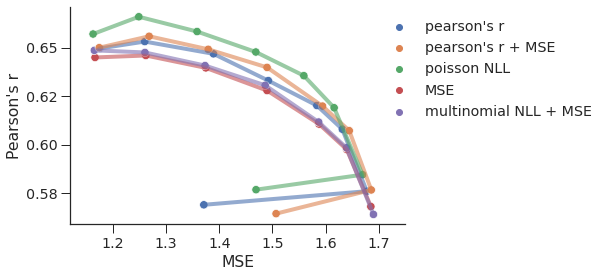

In [5]:
sns.set(font_scale=1.3)  
sns.set_style(style='white')
plt.rcParams['xtick.major.size'] = 9
plt.rcParams['xtick.major.width'] = 1

plt.rcParams['ytick.major.size'] = 9
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True


df = average_summary_performance
lines = sns.lineplot(data=df.sort_values('bin_size'), x='mse', 
                     y='pr_corr', hue='loss', sort=False, legend=False, linewidth=4, alpha=0.6)

points = sns.scatterplot(data=average_summary_performance, x='mse', y='pr_corr', hue='loss', 
                         ax=lines, legend='full', s=70)

points.legend(frameon=False, bbox_to_anchor=(0.9,1))
# plt.title('Basenji-based models')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Pearson\'s r')
plt.xlabel('MSE')
plt.xlim(1.12,1.75)
points.yaxis.set_major_locator(MaxNLocator(5)) 
# points.yaxis.set_major_locator(MaxNLocator(5)) 
points.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
points.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.savefig('binloss.svg')

# triangle plot

In [10]:
runs_dir = '../paper_runs/basenji/binloss_basenji'
resolution = [256, 1, 2048, 1024, 512, 128, 64, 32]

run_names = [os.path.join(runs_dir, r) for r in ['run-20210923_162932-56p3xy2p',
                                    'run-20210922_044222-5ueie0zy',
                                    'run-20210920_085441-14shgpx1',
                                    'run-20210920_082433-1ka588yc',
                                    'run-20210920_075434-wilgxp1a',
                                    'run-20210920_034502-n8axwb3r',
                                    'run-20210920_034501-7tftpu54',
                                    'run-20210920_034449-8p51o3ho']]

bin_run = dict(zip(resolution, run_names))
# get datasets
testset, targets = evaluate.collect_whole_testset('/home/shush/groundhog/data/15_ATAC_chr8/')



2022-03-14 09:47:27.946149: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-14 09:47:28.359791: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14253 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:c1:00.0, compute capability: 8.6


In [12]:
# get performance metrics for various evaluation bin sizes 
result_path = '../paper_tables/traingle_plot.txt'
bin_sizes = [1, 32, 64, 128, 256, 512, 1024, 2048]
if os.path.isfile(result_path):
    with open(result_path, 'r') as f:
        padded_values = json.loads(f.read())
else:
    performance_per_resolution = []
    for raw_bin_size in bin_run.keys():
        model, _ = utils.read_model(bin_run[raw_bin_size])
        all_true, all_pred = utils.get_true_pred(model, raw_bin_size, testset)
        for eval_bin_size in bin_sizes:
            if eval_bin_size>=raw_bin_size:
                print(raw_bin_size, '--->', eval_bin_size)
                true_for_eval = evaluate.change_resolution(all_true, raw_bin_size, eval_bin_size)
                pred_for_eval = evaluate.change_resolution(all_pred, raw_bin_size, eval_bin_size)
                performance = evaluate.get_performance(true_for_eval, pred_for_eval, targets, 'whole')
                performance_per_resolution.append([raw_bin_size, eval_bin_size] + list(performance.mean().values))
    metric_label = {'pr_corr':'Pearson r'}
    metric = list(metric_label.keys())[0]
    label = metric_label[metric]
    sorted_personr = pd.DataFrame(performance_per_resolution, columns=['train', 'eval']+list(performance.columns[:-1].values)).sort_values(['train', 'eval'])[['train', 'eval', metric]]

    padded_values = []
    for train_bin, df in sorted_personr.groupby('train'):
        pr_values = list(df[metric].values)
        add_N = len(bin_sizes)-len(pr_values)
        if add_N>0:
            pr_values = [np.nan for n in range(add_N)]+pr_values
        padded_values.append(pr_values)
    with open(result_path, 'w') as f:
        f.write(json.dumps(padded_values))

256 ---> 256


/tmp/ipykernel_1877376/3270099859.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  performance_per_resolution.append([raw_bin_size, eval_bin_size] + list(performance.mean().values))


256 ---> 512
256 ---> 1024


/home/peter/tf_2/lib/python3.8/site-packages/scipy/spatial/distance.py:1304: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


256 ---> 2048
1 ---> 1
1 ---> 32
1 ---> 64
1 ---> 128
1 ---> 256
1 ---> 512
1 ---> 1024
1 ---> 2048
2048 ---> 2048
1024 ---> 1024
1024 ---> 2048
512 ---> 512
512 ---> 1024
512 ---> 2048
128 ---> 128
128 ---> 256
128 ---> 512
128 ---> 1024
128 ---> 2048
64 ---> 64
64 ---> 128
64 ---> 256
64 ---> 512
64 ---> 1024
64 ---> 2048
32 ---> 32
32 ---> 64
32 ---> 128
32 ---> 256
32 ---> 512
32 ---> 1024
32 ---> 2048


Text(33.0, 0.5, 'Training bin size')

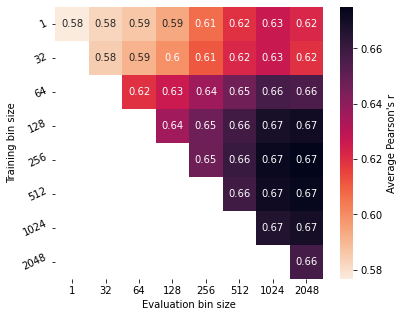

In [13]:
fig, ax = plt.subplots(figsize=[6, 5])
label = 'Pearson\'s r'
# creating mask
mask = np.triu(np.ones_like(padded_values), 1).T
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(padded_values, cmap="rocket_r", annot=True, mask=mask, 
                       cbar_kws={'label': "Average "+label}, ax=ax)
dataplot.set_xticks([r+0.5 for r in range(len(bin_sizes))]) 
dataplot.set_yticks([r+0.5 for r in range(len(bin_sizes))]) 
dataplot.set_xticklabels(bin_sizes) 
dataplot.set_yticklabels(bin_sizes, rotation=25) 
dataplot.set_xlabel('Evaluation bin size')
dataplot.set_ylabel('Training bin size')

# training set threshold

In [3]:
trainset_results = pd.read_csv('../paper_tables/model_evaluations/trainset_threshold.csv')

dataset_label = {'peak_centered': 'peak \ncentered',
                'random_chop': 2,
                 'threshold_4':4,
                 'threshold_6':6,
                 'threshold_8':8,
                'threshold_10':10}
trainset_results['dataset'] = [dataset_label[d.split('/i_3072')[0].split('/')[-1]] for d in trainset_results['data_dir'].values]

testset_type='whole'
whole_raw_results = trainset_results[(trainset_results['pred type']=='raw')&
                                    (trainset_results['eval type']==testset_type)]

metrics = whole_raw_results.groupby(['bin_size', 'dataset']).mean().reset_index()
descriptions = whole_raw_results.iloc[:,8:]
avg_metrics_per_run = metrics.merge(descriptions,how='left', on=['bin_size', 'dataset']).drop_duplicates(subset=['bin_size','dataset','eval type'])



In [18]:
avg_metrics_per_run['bin_size'] = [str(i) for i in avg_metrics_per_run['bin_size'].values]

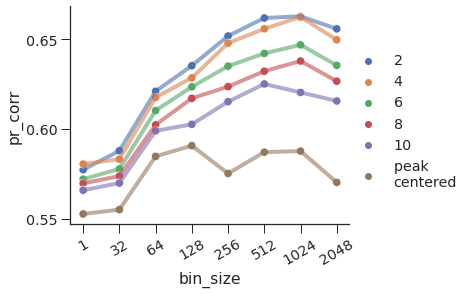

In [42]:
sns.set(font_scale=1.3)  
sns.set_style(style='white')
plt.rcParams['xtick.major.size'] = 9
plt.rcParams['xtick.major.width'] = 1

plt.rcParams['ytick.major.size'] = 9
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
fig, ax = plt.subplots(1,1, figsize=[5,4])
testset_types = ['whole', 'idr']

df = avg_metrics_per_run
lines = sns.lineplot(data=df, x='bin_size', 
                     y='pr_corr', hue='dataset', legend=False, linewidth=4, alpha=0.6)

points = sns.scatterplot(data=df, x='bin_size', y='pr_corr', hue='dataset', 
                         ax=lines, legend='full', s=70)
plt.legend(loc='lower center',bbox_to_anchor=(1.2,0.1),frameon=False)
points.spines['top'].set_visible(False)
points.spines['right'].set_visible(False)
plt.xticks(rotation=30);
points.yaxis.set_major_locator(MaxNLocator(3)) 
points.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.savefig('trainset.svg')

# test set threshold

In [6]:
run_path = glob.glob('trained_models/basenji/*/*c7k7jwqa')[0]
model, bin_size = utils.read_model(run_path)
testset, targets = evaluate.collect_whole_testset('datasets/chr8_testset_2K', coords=True)
_,np_x, np_y = utils.convert_tfr_to_np(testset)

In [7]:
bin_size

1

In [27]:
%%time
test_range = range(25)
pr_filename = 'intermediate_results/pr_df.csv'
pos_filename = 'intermediate_results/pos_df.csv'
if os.path.isfile(pr_filename) and os.path.isfile(pos_filename):
    pr_df = pd.read_csv(pr_filename, index_col='Unnamed: 0')
    pos_df = pd.read_csv(pos_filename, index_col='Unnamed: 0')
else:
    thresh_pr_dict = {}
    thresh_pos_dict = {}
    
    for thresh in tqdm(test_range):
        bool_mask = np_y.max(axis=1)>thresh # above threshold in any 1 cell_line
        thresh_inds = np.unique(np.argwhere(bool_mask).flatten())
        filtered_y = np_y[thresh_inds,:,:]

        filtered_x = np_x[thresh_inds,:,:]    
        N_seqs = thresh_inds.shape[0]
        binned_y = filtered_y.reshape(N_seqs, 2048//bin_size, bin_size, len(targets)).mean(axis=2)
        all_preds = utils.predict_np(filtered_x, model, batch_size=256, reshape_to_2D=False)
        thresh_pr_dict[thresh] = metrics.get_correlation_per_seq(binned_y, all_preds)
        thresh_pos_dict[thresh] = (filtered_y.max(axis=1)>thresh).sum(axis=0)
    pr_df = pd.DataFrame(thresh_pr_dict).T
    pos_df = pd.DataFrame(thresh_pos_dict).T
    pr_df.to_csv(pr_filename)
    pos_df.to_csv(pos_filename)

  0%|                                                                             | 0/25 [00:00<?, ?it/s]/home/peter/tf_2/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
100%|████████████████████████████████████████████████████████████████████| 25/25 [17:34<00:00, 42.18s/it]

CPU times: user 17min 7s, sys: 26.2 s, total: 17min 33s
Wall time: 17min 34s


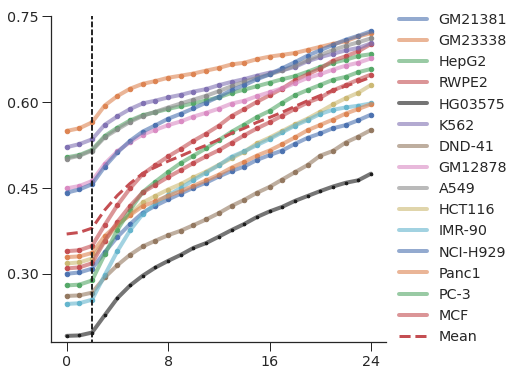

In [28]:
fig, axs = plt.subplots(1,1, figsize=[6,6])
sns.set(font_scale=1.3)  # crazy big
sns.set_style(style='white')
plt.rcParams['xtick.major.size'] = 9
plt.rcParams['xtick.major.width'] = 1

plt.rcParams['ytick.major.size'] = 9
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
sns.set_palette('hls', 15)
for cell_line in range(15):
    for d,df in enumerate([pr_df]):
        if cell_line == 4:
            axs.plot(test_range, df.iloc[:,cell_line], label = targets[cell_line], c='k', alpha=0.6, linewidth=4)
            axs.scatter(test_range, df.iloc[:,cell_line], c='k', s=7)
        else:
            axs.plot(test_range, df.iloc[:,cell_line], label = targets[cell_line], alpha=0.6, linewidth=4)
            axs.scatter(test_range, df.iloc[:,cell_line], s=20)
axs.plot(test_range, pr_df.mean(axis=1), linewidth=3, linestyle='--', color='r', label='Mean')

axs.vlines(2, 0,0.8, linestyles='--',colors ='k')
axs.vlines(2, axs.get_ylim()[0], axs.get_ylim()[1], linestyles='--',colors ='k')

axs.set_ylim(0.18,0.75)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.yaxis.set_major_locator(MaxNLocator(5)) 
axs.xaxis.set_major_locator(MaxNLocator(4)) 
axs.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs.xaxis.set_major_formatter(FormatStrFormatter('%i'))
axs.legend(loc="upper right", bbox_to_anchor=(1.4, 1.05),frameon=False)

In [45]:
run_path = glob.glob('trained_models/basenji/*/*c7k7jwqa')[0]
model, bin_size = utils.read_model(run_path)
testset, targets = evaluate.collect_whole_testset('datasets/4grid_atac/complete/peak_centered/i_2048_w_1/')
                                                                         
                                                  
                                                  

In [47]:
np_x, np_y = utils.convert_tfr_to_np(testset)

In [48]:
all_preds = utils.predict_np(np_x, model, batch_size=256, reshape_to_2D=False)

In [51]:
binned_y = np_y.reshape(-1, 2048//bin_size, bin_size, len(targets)).mean(axis=2)

In [53]:
peak_centered_pr = metrics.get_correlation_per_seq(binned_y, all_preds)

/home/peter/tf_2/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [55]:
np.mean(peak_centered_pr)

0.5256169276681909